In [1]:
import numpy as np
import matplotlib.pyplot as plt


def explicit_euler(f, h, t, y0):
    return y0 + h*f(t, y0)

# implicit euler method that uses the secant method to solve the resulting nonlinear equation
def backward_euler_secant(f, h, t, y0):
    # y0 = y1 + h*f(t, y0) => 0 = y1 - y0 + h*f(t, y1)
    # initial guesses for solution
    yp = explicit_euler(f, h, t, y0)
    yc = explicit_euler(f, h/2, t+h/2, explicit_euler(f, h/2, t, y0))
    temp = yp

    # iterate with secant method to compute solution
    while np.abs(yc - yp) > 1e-6:
        gp = (y0 - yp + h*f(t+h, yp))
        gc = (y0 - yc + h*f(t+h, yc))
        temp = yc
        yc = yc - gc*(yc - yp)/(gc - gp)
        yp = temp

    return yc

Above we have two versions of the euler method for solving ODE's, one explicit and one implicit. The implicit method uses a step of the explicit method and then 2 half steps of the explicit as initial guesses before we iterate with the secant method to solve the nonlinear equation.  We can test these methods by using the simple ODE y(t)' = -y(t) which has the analytic solution y = c*e^(-t):

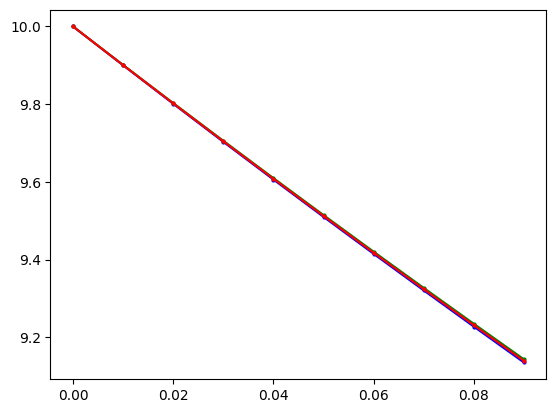

In [12]:
def f(t, y):
    return -y

y0 = 10
ye = [y0]
yi = [y0]
a = [y0]
h = 1/100

for t in range(9):
    yi.append( backward_euler_secant(f, h, t/100, yi[t]))
    ye.append( explicit_euler(f, h, t/100, ye[t]))
    a.append(10*np.exp(-(t+1)/100))

plt.plot([t/100 for t in range(10)], ye, color='blue', markersize=2, marker='o')
plt.plot([t/100 for t in range(10)], yi, color='green', markersize=2, marker='o')
plt.plot([t/100 for t in range(10)], a, color='red', markersize=2, marker='o')

 In general if we know f ahead of time and we dont mind computing it's derivative we can use Newtons method in place of the secant method to obtain a more accurate solution. For our simple example example this would be a bit overkill as we can easily solve the resulting equation:
    yk+1 = yk + h*(-yk+1) => yk+1 = yk/(1 + h)

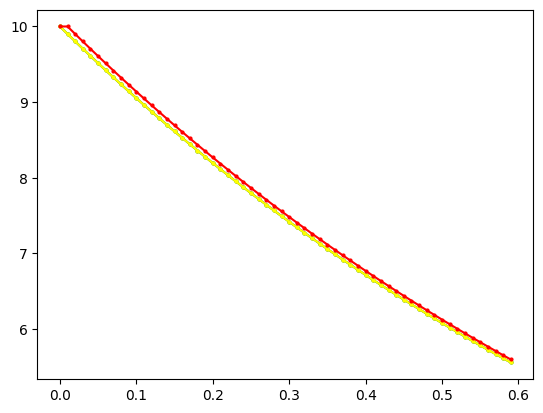

In [7]:
yi2 = [y0]
for t in range(59):
    yi2.append(yi[t]/(1+h))

plt.plot([t/100 for t in range(60)], yi, color='green', markersize=2, marker='o')
plt.plot([t/100 for t in range(60)], yi2, color='yellow', markersize=2, marker='o')
plt.plot([t/100 for t in range(60)], a, color='red', markersize=2, marker='o')

Now we want to consider a less trival case so we can actually see how much of a difference there is between Newtons method and the Secant method. Consider the equation: y' = -y^3

For this equation we have (yk+1 - yk)/h = -(yk+1)^3 => 0 = yk - yk+1 - h*(yk+1)^3 then replace yk+1 by the dummy variable x and we have the following formula for the Newton iteration: xn+1 = xn - (yk - xn - h*(xn)^3)/(1 - 3h*(xn)^2)

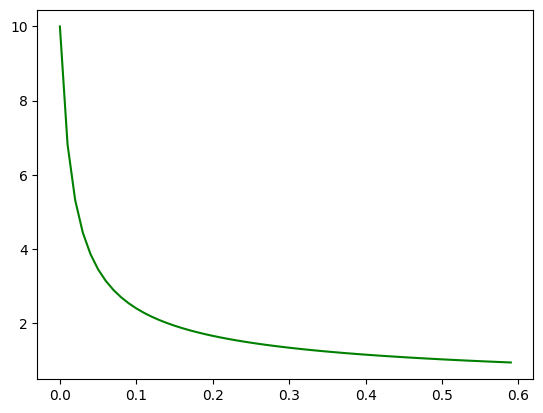

In [4]:
def backwards_euler_newton(f, h, t, y0):
    yc = explicit_euler(f, h, t, y0)
    yp = yc+1.0

    # iterate with secant method to compute solution
    while np.abs(yc - yp) > 1e-6:
        yp = yc 
        yc = yp - (y0 - yp - h*yp*yp*yp)/(-1 - 3*h*yp*yp)

    return yc


def f(t, y):
    return -y*y*y


yn = [y0]
for t in range(59):
    yn.append( backwards_euler_newton(f, h, t/100, yn[t]))

plt.plot([t/100 for t in range(60)], yn, color='green', markersize=2)

To get more accuracy we can use the "trapezoid method" which corresponds to integrating the ode using the trapezoid rule, the method is semi-implicit:  y0 = y1 + h*(f(t, y0) + f(t, y1))/2
We solve this the same way we did with the implicit euler method by using the Secant method to solve the non-linear equation at each step


In [5]:
# uses the second order implicit tradezoid method and then secant method to solve
def trapezoid_secant(f, h, t, y0):
    # y0 = y1 + h*(f(t, y0) + f(t, y1))/2
    # initial guesses for solution
    yp = explicit_euler(f, h, t, y0)
    yc = explicit_euler(f, h/2, t+h/2, explicit_euler(f, h/2, t, y0))
    temp = yp
    gc = (y0 - yp + h*(f(t, y0) + f(t+h, yp)))/2.0

    # iterate with secant method to compute solution
    while np.abs(yc - yp) > 1e-6:
        gp = gc
        gc = y0 - yc + h*(f(t, y0) + f(t+h, yc))/2.0
        temp = yc
        yc = yc - gc*(yc - yp)/(gc - gp)
        yp = temp

    return yc

Given and ODE y' = f(t, y) the problem is considered "stiff" if the jacobian on f(t, y) has eigenvalues that differ greatly, this leads to a lack of stability when we try to approach such problems using explicit numerical methods.